<h1 style="font-size: 64px; align-self: center;">Анализ недвижимости в турции</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("real_estate_data.csv", low_memory=False, index_col="id")

In [3]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
id,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,NaN,120000.0,TRY
403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,NaN,48000.0,EUR


In [4]:
df.duplicated().sum()

np.int64(11559)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391928 entries, 1 to 403487
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               391928 non-null  object 
 1   sub_type           391928 non-null  object 
 2   start_date         391928 non-null  object 
 3   end_date           259901 non-null  object 
 4   listing_type       391928 non-null  int64  
 5   tom                391928 non-null  int64  
 6   building_age       365686 non-null  object 
 7   total_floor_count  365188 non-null  object 
 8   floor_no           358401 non-null  object 
 9   room_count         391928 non-null  object 
 10  size               250200 non-null  float64
 11  address            391928 non-null  object 
 12  furnished          0 non-null       float64
 13  heating_type       365146 non-null  object 
 14  price              391455 non-null  float64
 15  price_currency     391455 non-null  object 
dtypes: floa

In [7]:
df.head(10)

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
id,,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY
7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750.0,TRY
8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000.0,TRY
9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000.0,TRY


In [8]:
df.isna().sum()


type                      0
sub_type                  0
start_date                0
end_date             132027
listing_type              0
tom                       0
building_age          26242
total_floor_count     26740
floor_no              33527
room_count                0
size                 141728
address                   0
furnished            391928
heating_type          26782
price                   473
price_currency          473
dtype: int64

In [9]:
df.drop(columns='furnished', inplace=True)

In [10]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY
403485,Konut,Daire,11/22/18,NaN,1,97,NaN,NaN,NaN,1+1,NaN,Antalya/Alanya/Saray,NaN,48000.0,EUR


In [11]:
df.dropna(subset='price', inplace=True)

In [12]:
df[df['price'].isna()]

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,


In [13]:
df.isna().sum()

type                      0
sub_type                  0
start_date                0
end_date             131554
listing_type              0
tom                       0
building_age          25913
total_floor_count     26427
floor_no              33171
room_count                0
size                 141356
address                   0
heating_type          26461
price                     0
price_currency            0
dtype: int64

In [14]:
delete = df[df['end_date'].isna() & df['floor_no'].isna() & df['total_floor_count'].isna() & df['building_age'].isna() & df['heating_type'].isna()]
delete

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
375518,Konut,Villa,12/19/18,NaN,1,70,NaN,NaN,NaN,2+1,95.0,Tekirdağ/Muratlı/Yeşilsırt,NaN,180000.0,TRY
376246,Konut,Daire,11/27/18,NaN,1,92,NaN,NaN,NaN,3+1,NaN,Kocaeli/Gölcük/Piyalepaşa,NaN,185000.0,TRY
376262,Konut,Daire,2/7/19,NaN,2,20,NaN,NaN,NaN,2+1,80.0,İstanbul/Bayrampaşa/Muratpaşa,NaN,1200.0,TRY
376264,Konut,Daire,1/24/19,NaN,1,34,NaN,NaN,NaN,2+1,110.0,Çanakkale/Biga/Sakarya,NaN,155000.0,TRY
376268,Konut,Daire,1/18/19,NaN,1,40,NaN,NaN,NaN,2+1,95.0,Aydın/Kuşadası/Davutlar,NaN,230000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403477,Konut,Daire,2/11/19,NaN,1,16,NaN,NaN,NaN,3+1,110.0,Ankara/Mamak/Araplar,NaN,200000.0,TRY
403483,Konut,Daire,9/18/18,NaN,2,162,NaN,NaN,NaN,+,NaN,İstanbul/Sultanbeyli/Adil,NaN,1500.0,TRY
403484,Konut,Daire,10/11/18,NaN,1,139,NaN,NaN,NaN,2+1,NaN,Sakarya/Adapazarı/Cumhuriyet,NaN,120000.0,TRY


In [15]:
df.drop(delete.index, inplace=True)

In [16]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,Konut,Daire,9/12/18,10/2/18,2,20,NaN,NaN,NaN,2+1,NaN,Konya/Selçuklu/Hanaybaşı,NaN,850.0,TRY
403479,Konut,Daire,10/12/18,11/11/18,1,30,NaN,NaN,NaN,3+1,NaN,Aydın/Didim/Efeler,NaN,500000.0,TRY
403480,Konut,Daire,9/12/18,11/20/18,2,69,NaN,NaN,NaN,3+1,NaN,Aydın/Kuşadası/Türkmen,NaN,1700.0,TRY


In [17]:
delete = df[df['floor_no'].isna() & df['total_floor_count'].isna()]
delete

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
210,Konut,Daire,2/15/19,NaN,1,12,0,NaN,NaN,3+1,120.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),Fancoil,1350000.0,TRY
234,Konut,Daire,2/25/19,NaN,2,2,NaN,NaN,NaN,1+1,45.0,Antalya/Muratpaşa/Muratpaşa,Fancoil,100.0,TRY
580,Konut,Daire,2/19/19,NaN,1,8,4,NaN,NaN,2+1,85.0,Muğla/Bodrum/Bitez,Yok,530000.0,TRY
646,Konut,Villa,1/29/19,NaN,1,29,2,NaN,NaN,5+1,160.0,İzmir/Çeşme/Çiftlik,Yok,920000.0,TRY
658,Konut,Villa,1/29/19,NaN,1,29,21-25 arası,NaN,NaN,3+2,250.0,İzmir/Çeşme/Alaçatı,Yok,885000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403478,Konut,Daire,9/12/18,10/2/18,2,20,NaN,NaN,NaN,2+1,NaN,Konya/Selçuklu/Hanaybaşı,NaN,850.0,TRY
403479,Konut,Daire,10/12/18,11/11/18,1,30,NaN,NaN,NaN,3+1,NaN,Aydın/Didim/Efeler,NaN,500000.0,TRY
403480,Konut,Daire,9/12/18,11/20/18,2,69,NaN,NaN,NaN,3+1,NaN,Aydın/Kuşadası/Türkmen,NaN,1700.0,TRY


In [18]:
df.drop(delete.index, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370564 entries, 1 to 394927
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               370564 non-null  object 
 1   sub_type           370564 non-null  object 
 2   start_date         370564 non-null  object 
 3   end_date           247957 non-null  object 
 4   listing_type       370564 non-null  int64  
 5   tom                370564 non-null  int64  
 6   building_age       363113 non-null  object 
 7   total_floor_count  365028 non-null  object 
 8   floor_no           358284 non-null  object 
 9   room_count         370564 non-null  object 
 10  size               241285 non-null  float64
 11  address            370564 non-null  object 
 12  heating_type       362478 non-null  object 
 13  price              370564 non-null  float64
 14  price_currency     370564 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 45.2+ 

In [20]:
df.isna().sum()

type                      0
sub_type                  0
start_date                0
end_date             122607
listing_type              0
tom                       0
building_age           7451
total_floor_count      5536
floor_no              12280
room_count                0
size                 129279
address                   0
heating_type           8086
price                     0
price_currency            0
dtype: int64

In [21]:
def process_floor_no(value):
    if pd.isna(value):
        return 0
    
    str_value = str(value)
    
    # Если значение содержит только буквы и/или пробелы (без цифр)
    if str_value.replace(' ', '').isalpha():
        return 0
    
    # Извлекаем цифры из смешанных значений
    digits = ''.join(filter(str.isdigit, str_value))
    return int(digits) if digits else 0

df['floor_no'] = df['floor_no'].apply(process_floor_no)

In [22]:
df.total_floor_count.value_counts()

total_floor_count
4              81003
3              75723
5              68120
10-20 arası    35612
2              26949
6              22467
10             12222
7              11933
8              10918
9               8766
20 ve üzeri     6498
1               4817
Name: count, dtype: int64

In [23]:
df

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,0,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394878,Konut,Daire,10/11/18,10/11/18,1,0,0,6,0,3+1,NaN,Bursa/Osmangazi/Hamitler,NaN,350000.0,TRY
394883,Konut,Müstakil Ev,10/4/18,11/5/18,1,32,26-30 arası,1,0,2+1,NaN,KKTC/İskele/Boğaz Mh.,NaN,35000.0,GBP
394917,Konut,Müstakil Ev,12/18/18,2/16/19,1,60,0,2,0,5+2,315.0,Muğla/Bodrum/Gündoğan,NaN,5500000.0,TRY


In [24]:
df[df['end_date'].isna() & df['floor_no'].isna() & df['total_floor_count'].isna() & df['building_age'].isna() & df['heating_type'].isna()]


,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,


In [25]:
df[df['total_floor_count'].isna() & df['floor_no'].isna()]

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,


In [26]:
df[df['size'].isna()]

,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,,
3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,0,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,0,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,Fancoil,1500000.0,TRY
13,Konut,Daire,9/13/18,10/13/18,1,30,0,3,2,2+1,NaN,Aydın/Efeler/Ata,Fancoil,270000.0,TRY
14,Konut,Rezidans,10/3/18,11/2/18,1,30,0,10-20 arası,11,2+1,NaN,Mersin/Yenişehir/Akkent,Fancoil,270000.0,TRY
15,Konut,Daire,9/22/18,NaN,1,158,1,4,3,3+1,NaN,Manisa/Turgutlu/Şehitler,Fancoil,75000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394823,Konut,Daire,9/26/18,11/25/18,1,60,0,4,0,3+1,NaN,İstanbul/Küçükçekmece/Yeşilova,NaN,430000.0,TRY
394855,Konut,Daire,10/15/18,11/7/18,1,23,0,5,0,2+1,NaN,Manisa/Turgutlu/Cumhuriyet,NaN,60000.0,TRY
394878,Konut,Daire,10/11/18,10/11/18,1,0,0,6,0,3+1,NaN,Bursa/Osmangazi/Hamitler,NaN,350000.0,TRY


In [27]:
df.sub_type.value_counts()

sub_type
Daire                  327611
Villa                   18962
Müstakil Ev              7786
Rezidans                 6981
Yazlık                   5460
Komple Bina              2346
Prefabrik Ev              478
Çiftlik Evi               425
Köşk / Konak / Yalı       253
Yalı Dairesi              167
Kooperatif                 63
Loft                       32
Name: count, dtype: int64

In [28]:
df.sub_type.unique()

array(['Rezidans', 'Daire', 'Villa', 'Müstakil Ev', 'Kooperatif',
       'Yazlık', 'Komple Bina', 'Prefabrik Ev', 'Köşk / Konak / Yalı',
       'Çiftlik Evi', 'Yalı Dairesi', 'Loft'], dtype=object)

In [29]:
dct = {}
i = 1
for name in df.sub_type.unique():
    dct[name] = i
    i+=1
dct

{'Rezidans': 1,
 'Daire': 2,
 'Villa': 3,
 'Müstakil Ev': 4,
 'Kooperatif': 5,
 'Yazlık': 6,
 'Komple Bina': 7,
 'Prefabrik Ev': 8,
 'Köşk / Konak / Yalı': 9,
 'Çiftlik Evi': 10,
 'Yalı Dairesi': 11,
 'Loft': 12}

In [30]:
df['sub_type'] = df['sub_type'].map(dct)

In [31]:
df.drop('type',axis=1, inplace=True)
df.rename(columns={'sub_type': 'type'}, inplace=True)

In [32]:
df

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
1,1,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,3500.0,TRY
2,2,2/13/19,NaN,1,14,0,20 ve üzeri,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,490000.0,TRY
3,2,10/9/18,11/8/18,1,30,0,1,0,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,155000.0,TRY
4,1,9/10/18,10/10/18,1,30,3,20 ve üzeri,20,6+1,450.0,İstanbul/Beşiktaş/Levent,Fancoil,32500000.0,TRY
5,1,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,1450000.0,TRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394878,2,10/11/18,10/11/18,1,0,0,6,0,3+1,NaN,Bursa/Osmangazi/Hamitler,NaN,350000.0,TRY
394883,4,10/4/18,11/5/18,1,32,26-30 arası,1,0,2+1,NaN,KKTC/İskele/Boğaz Mh.,NaN,35000.0,GBP
394917,4,12/18/18,2/16/19,1,60,0,2,0,5+2,315.0,Muğla/Bodrum/Gündoğan,NaN,5500000.0,TRY


In [33]:
df.total_floor_count.value_counts()

total_floor_count
4              81003
3              75723
5              68120
10-20 arası    35612
2              26949
6              22467
10             12222
7              11933
8              10918
9               8766
20 ve üzeri     6498
1               4817
Name: count, dtype: int64

In [34]:
df['total_floor_count'].isna().value_counts()

total_floor_count
False    365028
True       5536
Name: count, dtype: int64

In [35]:
df.floor_no.value_counts()

floor_no
0     96568
2     68743
3     54809
1     50524
4     35855
5     20686
6      9533
7      7478
8      5935
9      4729
10     3795
11     2823
12     2262
13     1660
20     1522
14     1311
15      889
16      583
17      365
18      320
19      174
Name: count, dtype: int64

### Giriş Katı - Цокольный этаж
### Müstakil - Дом
### Bahçe katı - садовый этаж
### Yüksek Giriş - 1 этаж
### Kot - просто этаж но по умному
### Teras Kat - Терасса
### Asma Kat - надстройка
### Zemin Kat - Цокольный
### Çatı Katı - пентхаус

In [36]:
df.drop(df[df['floor_no'] == 'Asma Kat'].index, axis=0, inplace=True)


In [37]:
df.replace(to_replace=['Zemin Kat', 'Giriş Katı'], value=0, inplace=True)


In [38]:
def process_floor_no(value):
    if pd.isna(value):
        return 0
    
    str_value = str(value)
    
    # Если значение содержит только буквы и/или пробелы (без цифр)
    if str_value.replace(' ', '').isalpha():
        return 0
    
    # Извлекаем цифры из смешанных значений
    digits = ''.join(filter(str.isdigit, str_value))
    return int(digits) if digits else 0

df['floor_no'] = df['floor_no'].apply(process_floor_no)

In [39]:
df.floor_no.value_counts()

floor_no
0     96568
2     68743
3     54809
1     50524
4     35855
5     20686
6      9533
7      7478
8      5935
9      4729
10     3795
11     2823
12     2262
13     1660
20     1522
14     1311
15      889
16      583
17      365
18      320
19      174
Name: count, dtype: int64

In [40]:
df.total_floor_count.value_counts()

total_floor_count
4              81003
3              75723
5              68120
10-20 arası    35612
2              26949
6              22467
10             12222
7              11933
8              10918
9               8766
20 ve üzeri     6498
1               4817
Name: count, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370564 entries, 1 to 394927
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   type               370564 non-null  int64  
 1   start_date         370564 non-null  object 
 2   end_date           247957 non-null  object 
 3   listing_type       370564 non-null  int64  
 4   tom                370564 non-null  int64  
 5   building_age       363113 non-null  object 
 6   total_floor_count  365028 non-null  object 
 7   floor_no           370564 non-null  int64  
 8   room_count         370564 non-null  object 
 9   size               241285 non-null  float64
 10  address            370564 non-null  object 
 11  heating_type       362478 non-null  object 
 12  price              370564 non-null  float64
 13  price_currency     370564 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 42.4+ MB


In [42]:
df.isna().sum()

type                      0
start_date                0
end_date             122607
listing_type              0
tom                       0
building_age           7451
total_floor_count      5536
floor_no                  0
room_count                0
size                 129279
address                   0
heating_type           8086
price                     0
price_currency            0
dtype: int64

In [43]:
df = df[df['building_age'].notna()]
df = df[df['total_floor_count'].notna()]
df = df[df['floor_no'].notna()]

In [44]:
df.isna().sum()


type                      0
start_date                0
end_date             118272
listing_type              0
tom                       0
building_age              0
total_floor_count         0
floor_no                  0
room_count                0
size                 125497
address                   0
heating_type           5672
price                     0
price_currency            0
dtype: int64

In [45]:
df['end_date'].fillna('Активно', inplace=True)
df['heating_type'].fillna('Без обогрева',inplace=True)

In [46]:
df.isna().sum()


type                      0
start_date                0
end_date                  0
listing_type              0
tom                       0
building_age              0
total_floor_count         0
floor_no                  0
room_count                0
size                 125497
address                   0
heating_type              0
price                     0
price_currency            0
dtype: int64

In [47]:
df['price_currency'].value_counts()

price_currency
TRY    357347
EUR       741
GBP       463
USD       433
Name: count, dtype: int64

In [48]:
exchange_rates = {
    'EUR': 48.08,
    'GBP': 55.0,
    'USD': 79.78,
    'TRY': 1
}

for i, row in df.iterrows():
    curr = row['price_currency']
    if curr in ['GBP', 'USD', 'TRY']:
        df.at[i, 'price'] = row['price'] * (exchange_rates[curr] / exchange_rates['EUR'])
        df.at[i, 'price_currency'] = 'EUR'

df.price_currency.value_counts()


price_currency
EUR    358984
Name: count, dtype: int64

In [49]:
pd.options.display.float_format = '{:.1f}'.format

In [50]:
df.describe()

,type,listing_type,tom,floor_no,size,price
count,358984.0,358984.0,358984.0,358984.0,233487.0,358984.0
mean,2.2,1.3,57.1,2.7,258.8,10128.3
std,0.8,0.5,43.9,3.1,8728.9,162118.7
min,1.0,1.0,0.0,0.0,1.0,-5.2
25%,2.0,1.0,30.0,0.0,85.0,57.2
50%,2.0,1.0,40.0,2.0,110.0,4263.7
75%,2.0,2.0,90.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,948235.0,43142262.9


In [51]:
df[df['price']<0]

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
350368,4,1/29/19,Активно,2,29,6-10 arası,2,0,3+1,95.0,İzmir/Kemalpaşa/Beşpınar,Soba (Kömür),-5.2,EUR


In [52]:
df[df['price']<0]

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
350368,4,1/29/19,Активно,2,29,6-10 arası,2,0,3+1,95.0,İzmir/Kemalpaşa/Beşpınar,Soba (Kömür),-5.2,EUR


In [53]:
df.describe()

,type,listing_type,tom,floor_no,size,price
count,358984.0,358984.0,358984.0,358984.0,233487.0,358984.0
mean,2.2,1.3,57.1,2.7,258.8,10128.3
std,0.8,0.5,43.9,3.1,8728.9,162118.7
min,1.0,1.0,0.0,0.0,1.0,-5.2
25%,2.0,1.0,30.0,0.0,85.0,57.2
50%,2.0,1.0,40.0,2.0,110.0,4263.7
75%,2.0,2.0,90.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,948235.0,43142262.9


In [54]:
df[df['price'] == 0]

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
1174,7,10/11/18,Активно,1,139,26-30 arası,2,0,+,NaN,İzmir/Konak/Duatepe,Yok,0.0,EUR
33966,6,9/3/18,Активно,1,177,6-10 arası,1,0,1+1,NaN,İzmir/Çeşme/Çiftlik,Klima,0.0,EUR
77017,2,9/3/18,Активно,1,177,6-10 arası,3,0,3+1,NaN,Aydın/Didim/Efeler,Klima,0.0,EUR
79723,3,10/5/18,Активно,1,145,2,3,0,4+1,NaN,Aydın/Didim/Akbük,Klima,0.0,EUR
84672,2,9/27/18,Активно,1,153,4,2,0,2+1,NaN,Muğla/Bodrum/Geriş,Klima,0.0,EUR
89121,3,9/19/18,Активно,1,161,11-15 arası,2,0,6+2,NaN,Muğla/Fethiye/Ölüdeniz,Klima,0.0,EUR
108289,2,8/31/18,Активно,1,180,0,5,0,3+1,NaN,İstanbul/Çatalca/Kaleiçi,Kombi (Doğalgaz),0.0,EUR
262322,1,11/27/18,Активно,2,92,1,10,8,2+1,NaN,Ankara/Etimesgut/Altay,Kombi (Doğalgaz),0.0,EUR
322061,2,9/3/18,Активно,1,177,0,7,3,3+1,NaN,İstanbul/Sancaktepe/Abdurrahmangazi,Merkezi Sistem (Isı Payı Ölçer),0.0,EUR


In [55]:
df = df[df['price'] > 0]

In [56]:
df.describe()

,type,listing_type,tom,floor_no,size,price
count,358973.0,358973.0,358973.0,358973.0,233486.0,358973.0
mean,2.2,1.3,57.1,2.7,258.8,10128.6
std,0.8,0.5,43.9,3.1,8728.9,162121.2
min,1.0,1.0,0.0,0.0,1.0,0.0
25%,2.0,1.0,30.0,0.0,85.0,57.2
50%,2.0,1.0,40.0,2.0,110.0,4263.7
75%,2.0,2.0,90.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,948235.0,43142262.9


In [57]:
df= df[df['price'] > 5]

In [58]:
df.describe()


,type,listing_type,tom,floor_no,size,price
count,356933.0,356933.0,356933.0,356933.0,232155.0,356933.0
mean,2.2,1.3,57.1,2.7,259.8,10186.4
std,0.8,0.4,43.9,3.1,8753.9,162582.0
min,1.0,1.0,0.0,0.0,1.0,5.1
25%,2.0,1.0,30.0,0.0,85.0,62.4
50%,2.0,1.0,40.0,2.0,110.0,4263.7
75%,2.0,2.0,90.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,948235.0,43142262.9


In [59]:
df[df['size'] < 10]

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
49,5,11/10/18,12/10/18,1,30,0,10,0,1+0,1.0,İzmir/Aliağa/Yenişakran,Fancoil,6239.6,EUR
109,5,11/10/18,1/9/19,1,60,0,10,0,1+0,1.0,İzmir/Aliağa/Yenişakran,Fancoil,6239.6,EUR
224,1,2/4/19,Активно,1,23,11-15 arası,20 ve üzeri,20,9+2,1.0,İstanbul/Beşiktaş/Vişnezade,Fancoil,2755823.6,EUR
362,3,11/9/18,Активно,3,110,2,3,1,2+1,2.0,Muğla/Bodrum/Yalıkavak,Fancoil,166.4,EUR
382,5,11/10/18,2/8/19,1,90,0,10,0,1+0,1.0,İzmir/Aliağa/Yenişakran,Fancoil,6239.6,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384010,3,11/26/18,Активно,1,93,6-10 arası,2,0,4+1,1.0,İstanbul/Çatalca/Çakıl,Без обогрева,20174.7,EUR
387663,3,12/13/18,2/11/19,1,60,0,2,0,4+2,3.0,Çanakkale/Bozcaada/Cumhuriyet,Без обогрева,28078.2,EUR
388229,2,10/24/18,11/23/18,2,30,4,10-20 arası,5,3+1,1.0,İstanbul/Ümraniye/Armağanevler,Без обогрева,31.2,EUR


In [60]:
df=df[df['size'] >= 10]

In [61]:
df.describe()

,type,listing_type,tom,floor_no,size,price
count,231807.0,231807.0,231807.0,231807.0,231807.0,231807.0
mean,2.2,1.3,47.8,2.7,260.2,8537.1
std,0.8,0.4,35.6,3.1,8760.4,116354.5
min,1.0,1.0,0.0,0.0,10.0,5.2
25%,2.0,1.0,24.0,0.0,86.0,72.8
50%,2.0,1.0,30.0,2.0,110.0,4263.7
75%,2.0,2.0,68.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,948235.0,34317803.7


In [62]:
df[df['size'] > 10000]

,type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
id,,,,,,,,,,,,,,
33,1,11/5/18,Активно,1,114,16-20 arası,7,0,6+3,618173.0,İstanbul/Avcılar/Yeşilkent,Fancoil,17616.5,EUR
90,2,1/7/19,1/7/19,1,0,1,20 ve üzeri,9,6+3,22699.0,Ankara/Elmadağ/Hasanoğlan Havuzbaşı,Fancoil,162222.0,EUR
149,2,12/24/18,12/24/18,1,0,21-25 arası,5,4,9+4,367331.0,İstanbul/Güngören/Gençosman,Fancoil,16809.9,EUR
306,2,12/24/18,12/24/18,1,0,1,3,2,8+3,363679.0,İstanbul/Güngören/Mehmet Nesih Özmen,Fancoil,1543.7,EUR
390,2,12/18/18,12/18/18,1,0,16-20 arası,4,7,8+3,608860.0,İstanbul/Beylikdüzü/Yakuplu,Fancoil,1435678.3,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,2,10/23/18,10/23/18,1,0,16-20 arası,8,4,10+0,161912.0,İstanbul/Avcılar/Cihangir,Kat Kaloriferi,935000.0,EUR
372455,2,12/12/18,12/12/18,1,0,6-10 arası,6,0,3+2,14251.0,Ankara/Elmadağ/Hasanoğlan Havuzbaşı,Kat Kaloriferi,400000.0,EUR
373002,2,12/25/18,Активно,1,64,5,4,16,7+2,64837.0,İstanbul/Güngören/Sanayi,Kat Kaloriferi,401923.3,EUR


In [63]:
df = df[df['size'] < 10000]

In [64]:
df.describe()

,type,listing_type,tom,floor_no,size,price
count,231695.0,231695.0,231695.0,231695.0,231695.0,231695.0
mean,2.2,1.3,47.8,2.7,128.4,8249.9
std,0.8,0.4,35.6,3.1,153.5,108768.9
min,1.0,1.0,0.0,0.0,10.0,5.2
25%,2.0,1.0,25.0,0.0,86.0,72.8
50%,2.0,1.0,30.0,2.0,110.0,4263.7
75%,2.0,2.0,68.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,9980.0,34317803.7


In [65]:
top20_indexes = df[df['size'] < 10000].nlargest(100, 'price').index
df.drop(top20_indexes, inplace=True)
df.describe()

,type,listing_type,tom,floor_no,size,price
count,231595.0,231595.0,231595.0,231595.0,231595.0,231595.0
mean,2.2,1.3,47.8,2.7,128.0,7107.7
std,0.8,0.4,35.6,3.1,149.1,19879.7
min,1.0,1.0,0.0,0.0,10.0,5.2
25%,2.0,1.0,25.0,0.0,86.0,72.8
50%,2.0,1.0,30.0,2.0,110.0,4263.7
75%,2.0,2.0,68.0,4.0,140.0,7279.5
max,11.0,3.0,180.0,20.0,9980.0,727953.4


In [66]:
def safe_sum_rooms(x):
    try:
        parts = list(map(int, x.split('+')))
        return sum(parts)
    except Exception:
        return None  # или np.nan, если импортирован numpy как np

df['room_count'] = df['room_count'].apply(safe_sum_rooms)

# Удаляем строки с некорректными значениями (где суммы нет)
df = df.dropna(subset=['room_count'])


In [67]:
import re

In [68]:
def process_building_age(value):
    if pd.isna(value):
        return np.nan
    
    # Преобразуем в строку и убираем лишние пробелы
    str_value = str(value).strip()
    
    # Если значение содержит тире (промежуток)
    if re.search(r'\d+\s*-\s*\d+', str_value):
        # Извлекаем числа из промежутка
        numbers = re.findall(r'\d+', str_value)
        if len(numbers) >= 2:
            start = int(numbers[0])
            end = int(numbers[1])
            # Выбираем случайное число из промежутка
            return np.random.randint(start, end + 1)
    
    # Если есть только цифры - извлекаем их
    digits = re.findall(r'\d+', str_value)
    if digits:
        return int(digits[0])
    
    # Если только текст - возвращаем NaN
    return 0

# Применяем функцию к столбцу
df['building_age'] = df['building_age'].apply(process_building_age)


In [69]:
df['building_age'] = df['building_age'].astype('int64')
df['room_count'] = df['room_count'].astype('int64')

In [70]:
df.heating_type.unique()

array(['Fancoil', 'Yok', 'Kalorifer (Doğalgaz)', 'Kalorifer (Kömür)',
       'Kombi (Elektrikli)', 'Klima', 'Kombi (Doğalgaz)',
       'Merkezi Sistem (Isı Payı Ölçer)', 'Merkezi Sistem',
       'Soba (Kömür)', 'Yerden Isıtma', 'Soba (Doğalgaz)',
       'Güneş Enerjisi', 'Kalorifer (Akaryakıt)', 'Jeotermal',
       'Kat Kaloriferi', 'Без обогрева'], dtype=object)

In [71]:
dct = {}
i = 1
for name in df.heating_type.unique():
    dct[name] = i
    i+=1
dct
df['heating_type'] = df['heating_type'].map(dct)


In [72]:
def process_total_floor_count(value):
    if pd.isna(value):
        return np.nan
    
    # Преобразуем в строку и убираем лишние пробелы
    str_value = str(value).strip()
    
    # Если значение содержит тире (промежуток) типа "10-15", "10 - 15" и т.д.
    if re.search(r'\d+\s*-\s*\d+', str_value):
        # Извлекаем числа из промежутка
        numbers = re.findall(r'\d+', str_value)
        if len(numbers) >= 2:
            start = int(numbers[0])
            end = int(numbers[1])
            # Выбираем случайное число из промежутка (включая границы)
            return np.random.randint(min(start, end), max(start, end) + 1)
    
    # Если есть только цифры - извлекаем первую группу цифр
    digits_match = re.search(r'\d+', str_value)
    if digits_match:
        return int(digits_match.group())
    
    return 0

# Применяем функцию к столбцу
df['total_floor_count'] = df['total_floor_count'].apply(process_total_floor_count)

# Разделим датасет на 2, один для продажи, один для аренды

In [73]:
df_to_divide = df[['listing_type','type', 'tom','building_age', 'total_floor_count', 
                   'floor_no','room_count','size', 'price', 'heating_type']]

In [74]:
df_to_divide

,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
id,,,,,,,,,,
1,2,1,30,0,20,2,3,90.0,72.8,1
2,1,2,14,0,20,20,1,43.0,10191.3,1
4,1,1,30,3,20,20,7,450.0,675956.7,1
5,1,1,30,0,20,2,3,90.0,30158.1,1
6,1,1,30,2,16,10,2,45.0,16223.0,1
...,...,...,...,...,...,...,...,...,...,...
394725,1,3,46,0,3,0,4,230.0,11127.3,17
394729,1,4,103,31,1,0,3,251.0,2059.1,17
394779,2,2,93,0,6,0,3,84.0,11.4,17


In [75]:
df_sell = df_to_divide[df_to_divide['listing_type'] == 1]
df_rent = df_to_divide[df_to_divide['listing_type'] == 2]
df_sell.reset_index(inplace=True)
df_rent.reset_index(inplace=True)

In [76]:
df_sell.dtypes

id                     int64
listing_type           int64
type                   int64
tom                    int64
building_age           int64
total_floor_count      int64
floor_no               int64
room_count             int64
size                 float64
price                float64
heating_type           int64
dtype: object

In [77]:
df_sell.describe()


,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
count,166825.0,166825.0,166825.0,166825.0,166825.0,166825.0,166825.0,166825.0,166825.0,166825.0,166825.0
mean,189099.6,1.0,2.2,50.5,5.8,5.7,2.6,3.8,131.0,9544.8,7.3
std,111828.5,0.0,0.8,36.5,8.2,4.1,3.0,1.1,152.7,21581.0,2.4
min,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,5.2,1.0
25%,88283.0,1.0,2.0,28.0,0.0,3.0,0.0,3.0,90.0,3847.8,6.0
50%,187889.0,1.0,2.0,33.0,2.0,4.0,2.0,4.0,115.0,5594.8,7.0
75%,287137.0,1.0,2.0,74.0,9.0,6.0,4.0,4.0,145.0,8735.4,7.0
max,394917.0,1.0,11.0,180.0,40.0,20.0,20.0,14.0,9980.0,727953.4,17.0


In [78]:
def remove_anomalies_advanced(df):
    df_clean = df.copy()
    
    # 1. Удаляем явные аномалии в категориальных переменных
    df_clean = df_clean[df_clean['type'].isin([1, 2, 3, 4,5,6,7,8,9,10,11])]  # только валидные типы
    df_clean = df_clean[df_clean['heating_type'].isin([1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17])]  # валидные типы отопления
    
    # 2. Более строгие границы для цены (используем 2 * IQR)
    Q1_price = df_clean['price'].quantile(0.25)
    Q3_price = df_clean['price'].quantile(0.75)
    IQR_price = Q3_price - Q1_price
    price_mask = (df_clean['price'] >= Q1_price - 2 * IQR_price) & \
                 (df_clean['price'] <= Q3_price + 2 * IQR_price)
    
    # 3. Рассчитываем цену за м² и убираем аномалии
    df_clean['price_per_sqm'] = df_clean['price'] / df_clean['size']
    Q1_pps = df_clean['price_per_sqm'].quantile(0.05)  # более строгие границы
    Q3_pps = df_clean['price_per_sqm'].quantile(0.95)
    pps_mask = (df_clean['price_per_sqm'] >= Q1_pps) & (df_clean['price_per_sqm'] <= Q3_pps)
    
    # 4. Более строгая проверка размера
    size_mask = (df_clean['size'] >= 20) & (df_clean['size'] <= 500)  # ужесточил границы
    
    # 5. Проверка логичности: 1 комната не может быть 500м², 10 комнат не могут быть 10м²
    room_size_ratio = df_clean['size'] / df_clean['room_count']
    room_size_mask = (room_size_ratio >= 10) & (room_size_ratio <= 100)  # 10-100 м² на комнату
    
    # 6. Проверка этажности (более строгая)
    floor_mask = (df_clean['floor_no'] <= df_clean['total_floor_count']) & \
                 (df_clean['floor_no'] >= 0) & \
                 (df_clean['total_floor_count'] >= 1) & \
                 (df_clean['total_floor_count'] <= 25)  # уменьшил максимум
    
    # 7. Возраст здания (более реалистично)
    age_mask = (df_clean['building_age'] >= 0) & (df_clean['building_age'] <= 30)
    
    # 8. Время на рынке
    tom_mask = (df_clean['tom'] >= 0) & (df_clean['tom'] <= 200)
    
    # Применяем все маски
    final_mask = (price_mask & pps_mask & size_mask & room_size_mask & 
                 floor_mask & age_mask & tom_mask)
    
    return df_clean[final_mask].drop('price_per_sqm', axis=1)

# Применяем улучшенную функцию
df_clean_advanced = remove_anomalies_advanced(df_sell)

In [79]:
df_clean_advanced.describe()

,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
count,141711.0,141711.0,141711.0,141711.0,141711.0,141711.0,141711.0,141711.0,141711.0,141711.0,141711.0
mean,187696.3,1.0,2.2,50.4,5.2,5.7,2.5,3.6,117.9,6311.4,7.3
std,109692.3,0.0,0.7,36.3,7.4,4.0,2.7,1.0,45.0,3294.3,2.3
min,27.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,20.0,831.9,1.0
25%,88161.5,1.0,2.0,28.0,0.0,3.0,1.0,3.0,89.0,3910.1,6.0
50%,187583.0,1.0,2.0,33.0,1.0,4.0,2.0,4.0,110.0,5407.7,7.0
75%,280413.0,1.0,2.0,73.0,8.0,6.0,3.0,4.0,140.0,7695.5,7.0
max,394784.0,1.0,11.0,180.0,30.0,20.0,20.0,13.0,500.0,18510.8,17.0


In [80]:
def analyze_remaining_anomalies(df_clean):
    print("Анализ оставшихся потенциальных аномалий:")
    
    # Цена за м²
    df_clean['price_per_sqm'] = df_clean['price'] / df_clean['size']
    
    # Находим экстремальные значения
    extreme_low = df_clean[df_clean['price_per_sqm'] < df_clean['price_per_sqm'].quantile(0.01)]
    extreme_high = df_clean[df_clean['price_per_sqm'] > df_clean['price_per_sqm'].quantile(0.99)]
    
    print(f"Экстремально низкая цена/м² (<1%): {len(extreme_low)} записей")
    print(f"Экстремально высокая цена/м² (>99%): {len(extreme_high)} записей")
    
    return extreme_low, extreme_high

extreme_low, extreme_high = analyze_remaining_anomalies(df_clean_advanced)

Анализ оставшихся потенциальных аномалий:
Экстремально низкая цена/м² (<1%): 1418 записей
Экстремально высокая цена/м² (>99%): 1418 записей


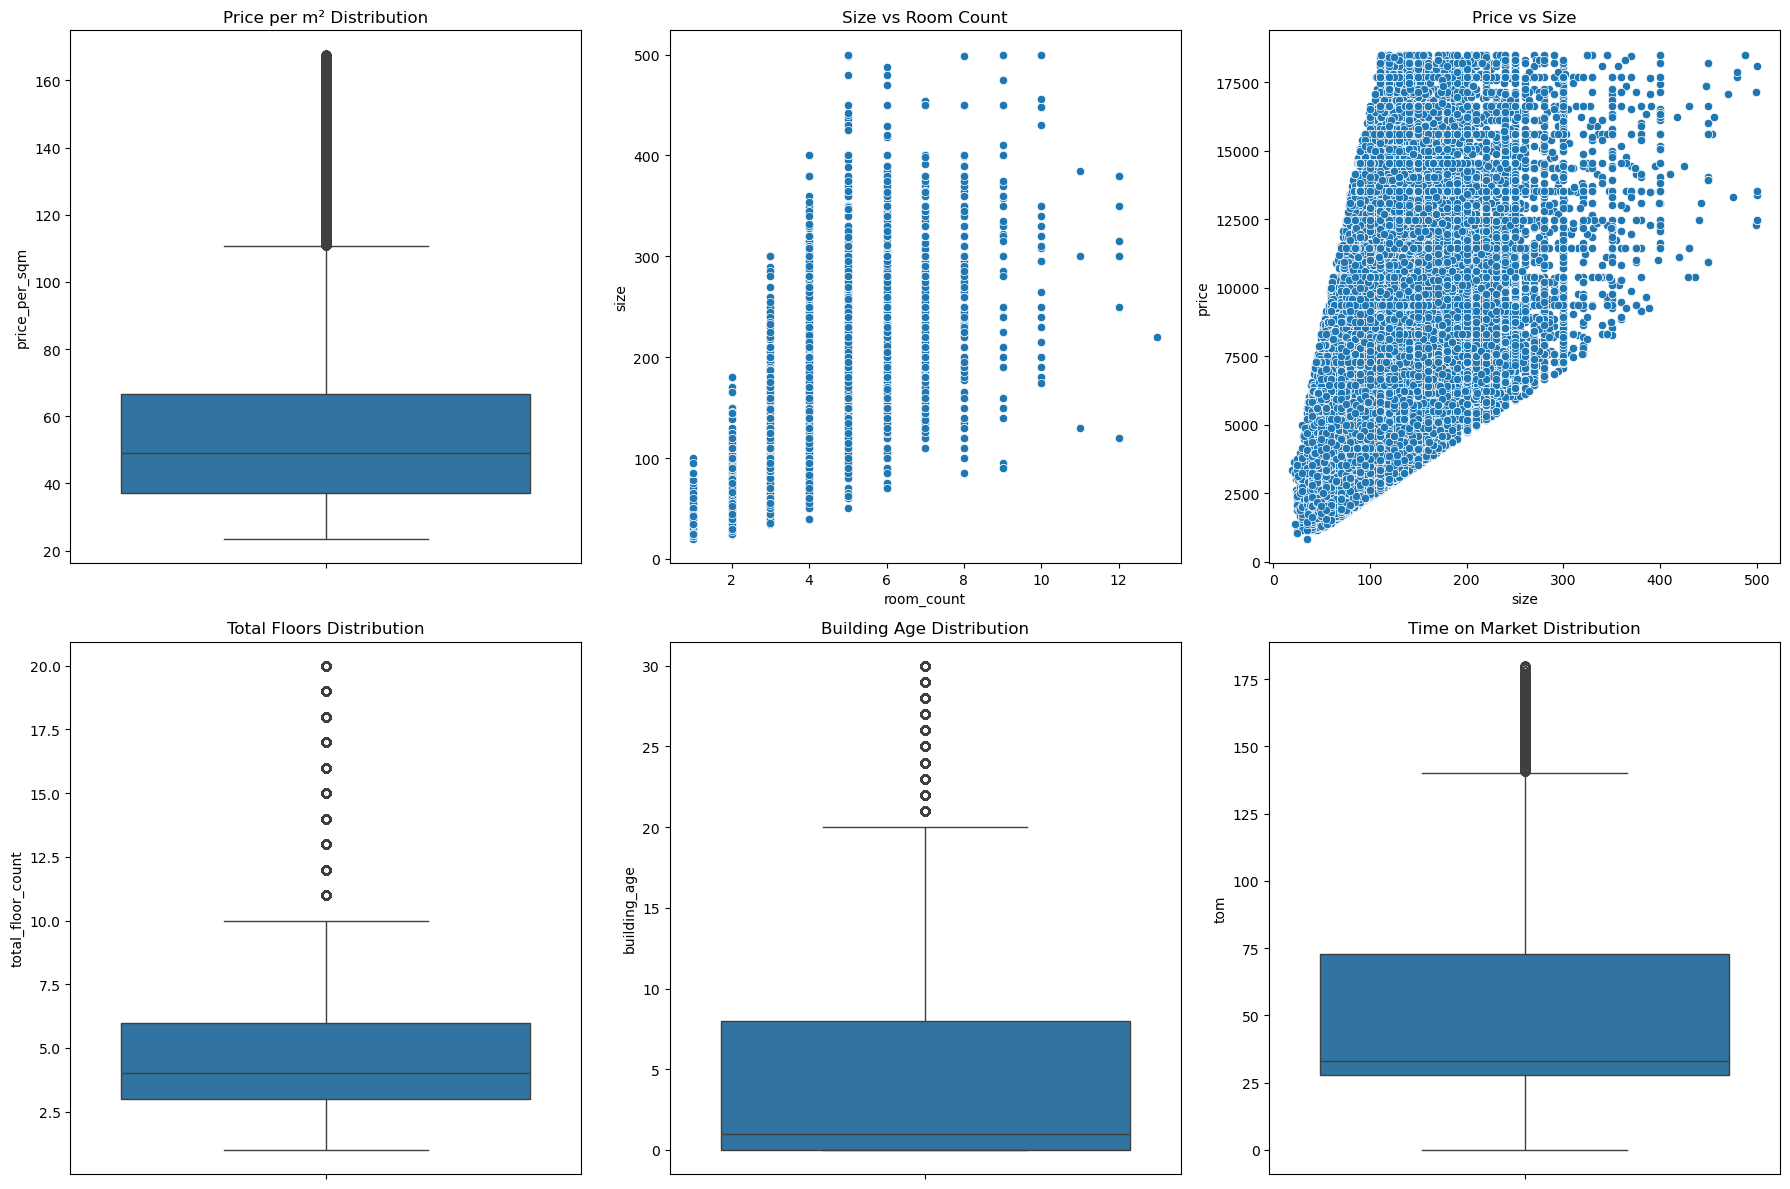

In [81]:
# Проверка распределения после очистки
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Цена за м²
df_clean_advanced['price_per_sqm'] = df_clean_advanced['price'] / df_clean_advanced['size']
sns.boxplot(data=df_clean_advanced, y='price_per_sqm', ax=axes[0,0])
axes[0,0].set_title('Price per m² Distribution')

# Соотношение размер/комнаты
sns.scatterplot(data=df_clean_advanced, x='room_count', y='size', ax=axes[0,1])
axes[0,1].set_title('Size vs Room Count')

# Цена vs Размер
sns.scatterplot(data=df_clean_advanced, x='size', y='price', ax=axes[0,2])
axes[0,2].set_title('Price vs Size')

# Этажность
sns.boxplot(data=df_clean_advanced, y='total_floor_count', ax=axes[1,0])
axes[1,0].set_title('Total Floors Distribution')

# Возраст здания
sns.boxplot(data=df_clean_advanced, y='building_age', ax=axes[1,1])
axes[1,1].set_title('Building Age Distribution')

# Время на рынке
sns.boxplot(data=df_clean_advanced, y='tom', ax=axes[1,2])
axes[1,2].set_title('Time on Market Distribution')

plt.tight_layout()
plt.show()

In [82]:
def remove_price_anomalies(df):
    df_clean = df.copy()
    
    # Рассчитываем цену за м²
    df_clean['price_per_sqm'] = df_clean['price'] / df_clean['size']
    
    # Определяем границы по перцентилям
    lower_bound = df_clean['price_per_sqm'].quantile(0.01)  # Нижний 1%
    upper_bound = df_clean['price_per_sqm'].quantile(0.99)  # Верхний 99%
    
    print(f"Границы цены за м²: {lower_bound:.2f} - {upper_bound:.2f}")
    
    # Удаляем аномалии
    mask = (df_clean['price_per_sqm'] >= lower_bound) & (df_clean['price_per_sqm'] <= upper_bound)
    df_cleaned = df_clean[mask].drop('price_per_sqm', axis=1)
    
    print(f"Удалено записей: {len(df_clean) - len(df_cleaned)}")
    
    return df_cleaned

# Применяем
df_final = remove_price_anomalies(df_clean_advanced)

Границы цены за м²: 24.40 - 143.23
Удалено записей: 2836


In [83]:
df_final.describe()

,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
count,138875.0,138875.0,138875.0,138875.0,138875.0,138875.0,138875.0,138875.0,138875.0,138875.0,138875.0
mean,187699.8,1.0,2.2,50.4,5.2,5.7,2.5,3.6,118.1,6274.6,7.3
std,109648.6,0.0,0.7,36.3,7.3,4.0,2.7,1.0,44.9,3225.0,2.3
min,27.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,23.0,1039.9,1.0
25%,88159.0,1.0,2.0,28.0,0.0,3.0,1.0,3.0,89.0,3930.9,6.0
50%,187691.0,1.0,2.0,33.0,1.0,4.0,2.0,4.0,110.0,5407.7,7.0
75%,280230.5,1.0,2.0,73.0,8.0,6.0,3.0,4.0,140.0,7695.5,7.0
max,394784.0,1.0,11.0,180.0,30.0,20.0,20.0,13.0,500.0,18510.8,17.0


##### Присваиваем df_sell к df_final

In [84]:
df_sell= df_final

# Перейдем к df_rent

In [85]:
df_rent.describe()

,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
count,63656.0,63656.0,63656.0,63656.0,63656.0,63656.0,63656.0,63656.0,63656.0,63656.0,63656.0
mean,196900.1,2.0,2.0,40.7,9.6,6.3,3.1,3.5,113.3,59.8,7.3
std,106270.7,0.0,0.5,32.2,9.3,4.5,3.4,1.0,57.8,551.7,2.1
min,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,10.0,5.2,1.0
25%,111146.2,2.0,2.0,18.0,1.0,4.0,1.0,3.0,80.0,18.7,7.0
50%,202659.0,2.0,2.0,30.0,7.0,5.0,2.0,4.0,105.0,25.0,7.0
75%,287135.2,2.0,2.0,60.0,16.0,7.0,4.0,4.0,135.0,36.4,7.0
max,394779.0,2.0,11.0,180.0,40.0,20.0,20.0,12.0,3450.0,102953.4,17.0


In [86]:
def remove_rent_anomalies(df):
    df_clean = df.copy()
    
    # 1. Удаляем явные аномалии в категориальных переменных
    df_clean = df_clean[df_clean['type'].isin([1, 2, 3, 4,5,6,7,8,9,10,11])]  # только валидные типы
    df_clean = df_clean[df_clean['heating_type'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,14,15,16,17])]  
    
    # 2. Рассчитываем цену за м² (аренда в месяц)
    df_clean['price_per_sqm'] = df_clean['price'] / df_clean['size']
    
    lower_bound_pps = df_clean['price_per_sqm'].quantile(0.005)  
    upper_bound_pps = df_clean['price_per_sqm'].quantile(0.995)
    pps_mask = (df_clean['price_per_sqm'] >= lower_bound_pps) & (df_clean['price_per_sqm'] <= upper_bound_pps)
    
    lower_bound_price = df_clean['price'].quantile(0.005)
    upper_bound_price = df_clean['price'].quantile(0.995)
    price_mask = (df_clean['price'] >= lower_bound_price) & (df_clean['price'] <= upper_bound_price)
    
    # 5. Проверка размера помещения (аренда обычно меньшие помещения)
    size_mask = (df_clean['size'] >= 15) & (df_clean['size'] <= 200)
    
    # 6. Проверка логичности: цена/комната
    price_per_room = df_clean['price'] / df_clean['room_count']
    lower_room = price_per_room.quantile(0.01)
    upper_room = price_per_room.quantile(0.99)
    room_price_mask = (price_per_room >= lower_room) & (price_per_room <= upper_room)
    
    floor_mask = (df_clean['floor_no'] <= df_clean['total_floor_count']) & \
                 (df_clean['floor_no'] >= 0) & \
                 (df_clean['total_floor_count'] >= 1) & \
                 (df_clean['total_floor_count'] <= 20)
    
    age_mask = (df_clean['building_age'] >= 0) & (df_clean['building_age'] <= 40)
    
    tom_mask = (df_clean['tom'] >= 0) & (df_clean['tom'] <= 200)
    
    room_count_mask = (df_clean['room_count'] >= 1) & (df_clean['room_count'] <= 7)
    
    # Применяем все маски
    final_mask = (pps_mask & price_mask & size_mask & room_price_mask & 
                 floor_mask & age_mask & tom_mask & room_count_mask)
    
    df_cleaned = df_clean[final_mask].drop('price_per_sqm', axis=1)
    
    # Статистика очистки
    print(f"Исходно записей: {len(df)}")
    print(f"После очистки: {len(df_cleaned)}")
    print(f"Удалено: {len(df) - len(df_cleaned)} записей")
    print(f"Сохранили: {len(df_cleaned)/len(df)*100:.1f}% данных")
    
    return df_cleaned

# Применяем очистку
df_rent_clean = remove_rent_anomalies(df_rent)

Исходно записей: 63656
После очистки: 59252
Удалено: 4404 записей
Сохранили: 93.1% данных


АНАЛИЗ РЕЗУЛЬТАТОВ ОЧИСТКИ АРЕНДЫ

Основная статистика после очистки:
Средняя цена аренды: 36.57
Средняя цена за м²: 0.35
Средний размер: 105.7 м²
Среднее количество комнат: 3.4

Осталось экстремально низких значений: 575
Осталось экстремально высоких значений: 581


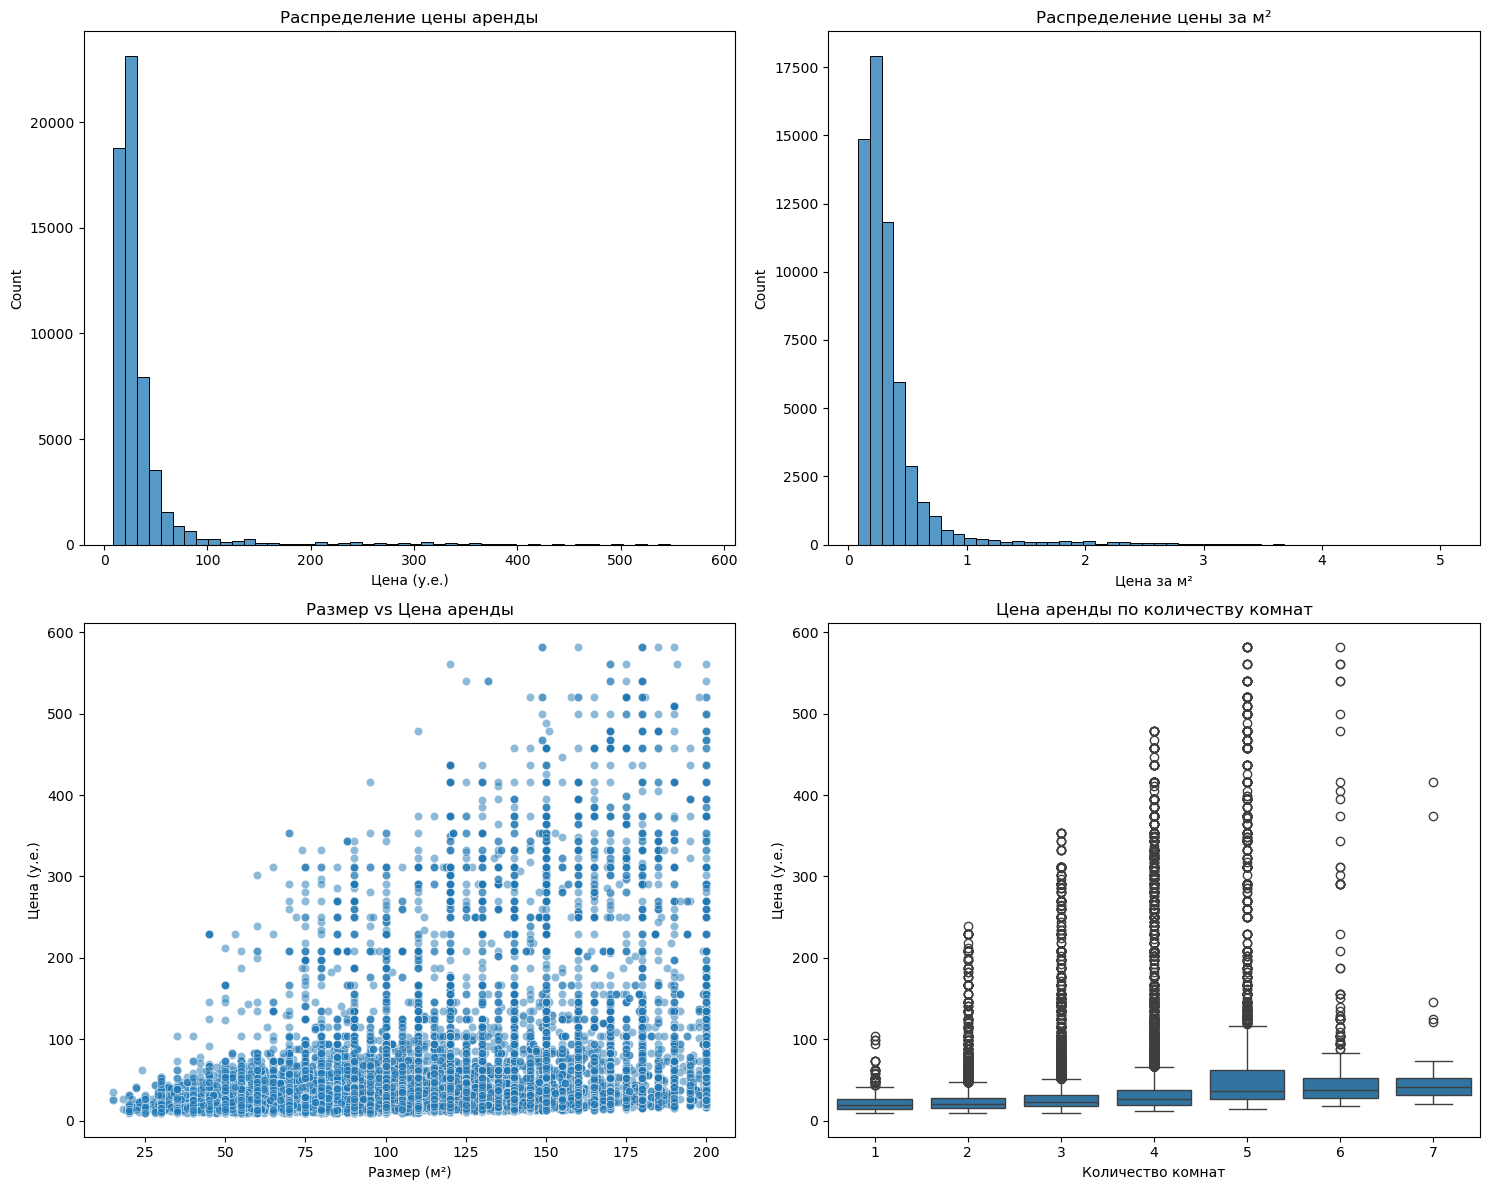

In [87]:
def analyze_rent_clean_results(df_clean):
    df_check = df_clean.copy()
    
    # Рассчитываем цену за м²
    df_check['price_per_sqm'] = df_check['price'] / df_check['size']
    
    print("=" * 50)
    print("АНАЛИЗ РЕЗУЛЬТАТОВ ОЧИСТКИ АРЕНДЫ")
    print("=" * 50)
    
    # Основная статистика
    print("\nОсновная статистика после очистки:")
    print(f"Средняя цена аренды: {df_check['price'].mean():.2f}")
    print(f"Средняя цена за м²: {df_check['price_per_sqm'].mean():.2f}")
    print(f"Средний размер: {df_check['size'].mean():.1f} м²")
    print(f"Среднее количество комнат: {df_check['room_count'].mean():.1f}")
    
    # Проверяем экстремальные значения
    extreme_low = df_check[df_check['price_per_sqm'] < df_check['price_per_sqm'].quantile(0.01)]
    extreme_high = df_check[df_check['price_per_sqm'] > df_check['price_per_sqm'].quantile(0.99)]
    
    print(f"\nОсталось экстремально низких значений: {len(extreme_low)}")
    print(f"Осталось экстремально высоких значений: {len(extreme_high)}")
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Цена аренды
    sns.histplot(df_check['price'], bins=50, ax=axes[0,0])
    axes[0,0].set_title('Распределение цены аренды')
    axes[0,0].set_xlabel('Цена (у.е.)')
    
    # Цена за м²
    sns.histplot(df_check['price_per_sqm'], bins=50, ax=axes[0,1])
    axes[0,1].set_title('Распределение цены за м²')
    axes[0,1].set_xlabel('Цена за м²')
    
    # Размер vs Цена
    sns.scatterplot(data=df_check, x='size', y='price', alpha=0.5, ax=axes[1,0])
    axes[1,0].set_title('Размер vs Цена аренды')
    axes[1,0].set_xlabel('Размер (м²)')
    axes[1,0].set_ylabel('Цена (у.е.)')
    
    # Комнаты vs Цена
    sns.boxplot(data=df_check, x='room_count', y='price', ax=axes[1,1])
    axes[1,1].set_title('Цена аренды по количеству комнат')
    axes[1,1].set_xlabel('Количество комнат')
    axes[1,1].set_ylabel('Цена (у.е.)')
    
    plt.tight_layout()
    plt.show()
    
    return df_check

# Анализируем результаты
df_rent_analyzed = analyze_rent_clean_results(df_rent_clean)

In [88]:
def check_rent_logic(df):
    """Проверка логических несоответствий в данных аренды"""
    
    print("Проверка логических несоответствий:")
    
    # 1. Слишком низкая цена для размера/локации
    avg_price_per_sqm = df['price'].sum() / df['size'].sum()
    low_price_mask = (df['price'] / df['size']) < (avg_price_per_sqm * 0.3)
    print(f"Подозрительно низкая цена: {low_price_mask.sum()} записей")
    
    # 2. Слишком высокая цена для количества комнат
    avg_price_per_room = df['price'].sum() / df['room_count'].sum()
    high_room_price_mask = (df['price'] / df['room_count']) > (avg_price_per_room * 3)
    print(f"Подозрительно высокая цена за комнату: {high_room_price_mask.sum()} записей")
    
    # 3. Несоответствие размера и количества комнат
    size_per_room = df['size'] / df['room_count']
    unusual_size_mask = (size_per_room < 10) | (size_per_room > 80)
    print(f"Необычное соотношение размер/комнаты: {unusual_size_mask.sum()} записей")
    
    # Можно дополнительно очистить эти записи
    logic_mask = ~(low_price_mask | high_room_price_mask | unusual_size_mask)
    df_logical = df[logic_mask].copy()
    
    print(f"После логической проверки осталось: {len(df_logical)} записей")
    
    return df_logical

# Применяем логическую проверку
df_rent_final = check_rent_logic(df_rent_clean)

Проверка логических несоответствий:
Подозрительно низкая цена: 799 записей
Подозрительно высокая цена за комнату: 2232 записей
Необычное соотношение размер/комнаты: 25 записей
После логической проверки осталось: 56201 записей


In [89]:
print("=" * 60)
print("ФИНАЛЬНАЯ СТАТИСТИКА ОЧИСТКИ ДАННЫХ АРЕНДЫ")
print("=" * 60)
print(f"Исходный размер датасета: {len(df_rent)} записей")
print(f"После комплексной очистки: {len(df_rent_clean)} записей")
print(f"После логической проверки: {len(df_rent_final)} записей")
print(f"Общий процент сохраненных данных: {len(df_rent_final)/len(df_rent)*100:.1f}%")

# Сохраняем очищенные данные

ФИНАЛЬНАЯ СТАТИСТИКА ОЧИСТКИ ДАННЫХ АРЕНДЫ
Исходный размер датасета: 63656 записей
После комплексной очистки: 59252 записей
После логической проверки: 56201 записей
Общий процент сохраненных данных: 88.3%


In [90]:
df_rent_final.describe()

,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
count,56201.0,56201.0,56201.0,56201.0,56201.0,56201.0,56201.0,56201.0,56201.0,56201.0,56201.0
mean,197523.6,2.0,2.0,40.0,9.6,6.2,3.0,3.4,104.1,28.8,7.2
std,104291.7,0.0,0.4,31.8,9.4,4.3,3.0,0.9,35.2,16.6,2.1
min,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,18.0,8.8,1.0
25%,117484.0,2.0,2.0,17.0,1.0,4.0,1.0,3.0,80.0,18.7,7.0
50%,203090.0,2.0,2.0,30.0,7.0,5.0,2.0,3.0,100.0,25.0,7.0
75%,283721.0,2.0,2.0,60.0,16.0,7.0,4.0,4.0,127.0,33.3,7.0
max,394779.0,2.0,11.0,180.0,40.0,20.0,20.0,7.0,200.0,187.2,17.0


АНАЛИЗ РЕЗУЛЬТАТОВ ОЧИСТКИ АРЕНДЫ

Основная статистика после очистки:
Средняя цена аренды: 28.84
Средняя цена за м²: 0.30
Средний размер: 104.1 м²
Среднее количество комнат: 3.4

Осталось экстремально низких значений: 546
Осталось экстремально высоких значений: 562


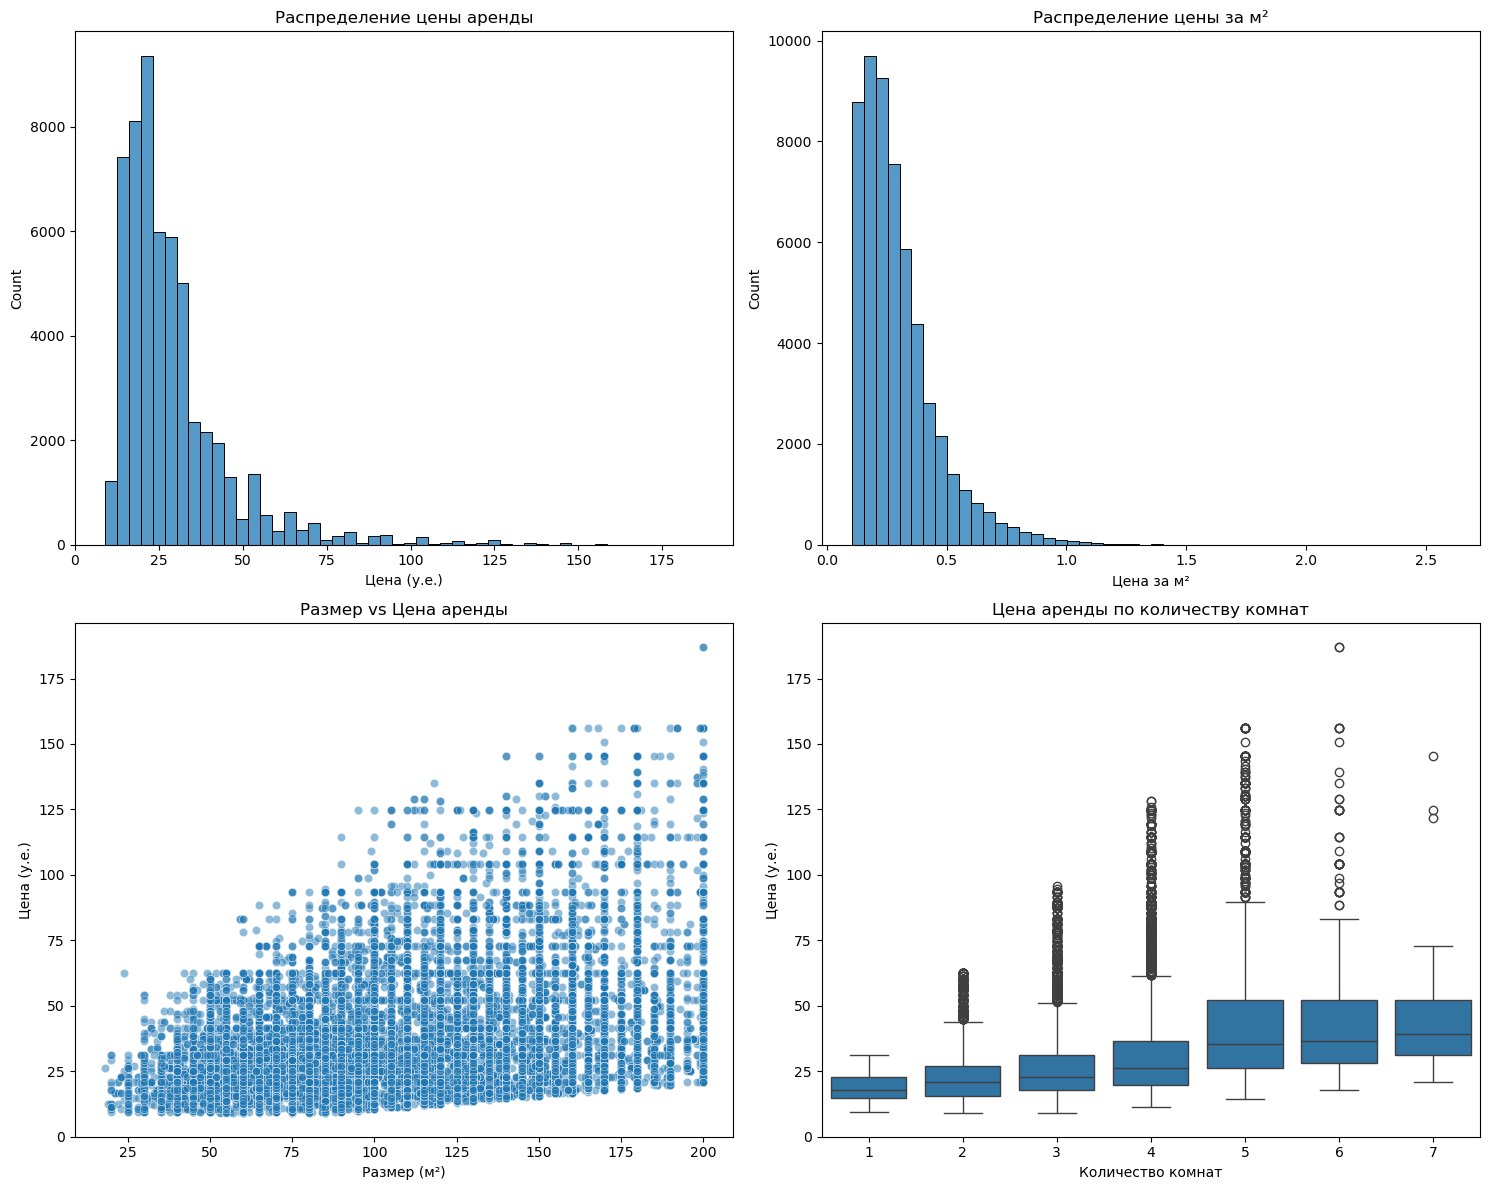

,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type,price_per_sqm
0,1,2,1,30,0,20,2,3,90.0,72.8,1,0.8
1,7,2,2,54,0,20,14,4,160.0,78.0,1,0.5
3,16,2,3,94,8,2,0,5,200.0,74.9,1,0.4
4,18,2,2,30,0,20,20,3,84.0,87.4,1,1.0
6,24,2,2,52,1,19,11,3,100.0,22.9,1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
63651,394196,2,2,30,2,2,0,3,78.0,22.9,17,0.3
63652,394228,2,2,7,0,7,0,2,60.0,13.5,17,0.2
63653,394398,2,2,75,2,2,0,3,78.0,22.9,17,0.3
63654,394468,2,2,29,16,4,0,3,90.0,52.0,17,0.6


In [91]:
analyze_rent_clean_results(df_rent_final)

In [92]:
df_rent = df_rent_final

In [93]:
df_rent_final

,id,listing_type,type,tom,building_age,total_floor_count,floor_no,room_count,size,price,heating_type
0,1,2,1,30,0,20,2,3,90.0,72.8,1
1,7,2,2,54,0,20,14,4,160.0,78.0,1
3,16,2,3,94,8,2,0,5,200.0,74.9,1
4,18,2,2,30,0,20,20,3,84.0,87.4,1
6,24,2,2,52,1,19,11,3,100.0,22.9,1
...,...,...,...,...,...,...,...,...,...,...,...
63651,394196,2,2,30,2,2,0,3,78.0,22.9,17
63652,394228,2,2,7,0,7,0,2,60.0,13.5,17
63653,394398,2,2,75,2,2,0,3,78.0,22.9,17
63654,394468,2,2,29,16,4,0,3,90.0,52.0,17


# Машинное обучение

# Приступим с датасета аренды. Сделаем регрессию и классификацию

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, accuracy_score  
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import importlib
importlib.reload(np)

<module 'numpy' from 'c:\\Users\\user\\anaconda3\\envs\\anaconda_py311\\Lib\\site-packages\\numpy\\__init__.py'>

In [120]:
df_ansamble_rent = df_rent[["type", "tom", "building_age", "total_floor_count", "floor_no", "room_count", "size", "price", "heating_type"]]

In [96]:
X = df_ansamble_rent.drop(['price', 'type'], axis=1)
y_reg = df_ansamble_rent['price']
y_clf = df_ansamble_rent['type']

# Ключевые признаки в регрессии - price


# В классификации - type 

In [97]:
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler стандартизирует данные - приводит их к нормальному распределению

In [99]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, VotingClassifier
from xgboost import XGBRegressor, XGBClassifier

In [100]:
voting_reg = VotingRegressor([
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
], weights=[3, 2, 1])

In [101]:
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
gb_reg = GradientBoostingRegressor(n_estimators=500, random_state=42)
xgb_reg = XGBRegressor(n_estimators=500, random_state=42, n_jobs=-1)

In [115]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
]

stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

models_reg = {
    'Random Forest': rf_reg,
    'Gradient Boosting': gb_reg,
    'Stacking Regressor': stacking_reg,
    'Voting Ensemble': VotingRegressor(estimators, weights=[3, 2])  # также можно обновить, если нужно
}

for name, model in models_reg.items():
    print(f"Обучение {name}...")
    model.fit(X_train_scaled, y_reg_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    
    print(f'{name}:')
    print(f'  MSE: {mse:.2f}')
    print(f'  R²: {r2:.3f}')
    print('---')

Обучение Random Forest...
Random Forest:
  MSE: 187.17
  R²: 0.326
---
Обучение Gradient Boosting...
Gradient Boosting:
  MSE: 194.98
  R²: 0.298
---
Обучение Stacking Regressor...
Stacking Regressor:
  MSE: 183.71
  R²: 0.338
---
Обучение Voting Ensemble...
Voting Ensemble:
  MSE: 185.02
  R²: 0.334
---


# Классификация для аренды

In [106]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [107]:
le_type = LabelEncoder()
y_clf_train_encoded = le_type.fit_transform(y_clf_train)
y_clf_test_encoded = le_type.transform(y_clf_test)

voting_clf = VotingClassifier([
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1))
])

In [108]:
models_clf = {
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1),
    'Voting Ensemble': voting_clf
}

In [109]:
for name, model in models_clf.items():
    print(f"Обучение {name}...")
    model.fit(X_train_scaled, y_clf_train_encoded)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_clf_test_encoded, y_pred)
    
    print(f'{name}:')
    print(f'  Accuracy: {accuracy:.3f}')
    print('---')

Обучение Random Forest...
Random Forest:
  Accuracy: 0.964
---
Обучение Gradient Boosting...
Gradient Boosting:
  Accuracy: 0.073
---
Обучение XGBoost...
XGBoost:
  Accuracy: 0.962
---
Обучение Voting Ensemble...
Voting Ensemble:
  Accuracy: 0.963
---


In [110]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

for name, model in models_clf.items():
    print(f"╔{'═'*50}╗")
    print(f"║ {name:^48} ║")
    print(f"╚{'═'*50}╝")
    
    # Обучение модели
    model.fit(X_train_scaled, y_clf_train_encoded)
    y_pred = model.predict(X_test_scaled)
    
    # Базовые метрики
    accuracy = accuracy_score(y_clf_test_encoded, y_pred)
    precision = precision_score(y_clf_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_clf_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_clf_test_encoded, y_pred, average='weighted')
    
    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1-Score:  {f1:.3f}")
    
    # Матрица ошибок
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_clf_test_encoded, y_pred)
    print(cm)
    
    # Детальный отчет
    print("\nClassification Report:")
    print(classification_report(y_clf_test_encoded, y_pred))
    
    print("\n" + "═"*50 * 2 + "\n")

╔══════════════════════════════════════════════════╗
║                  Random Forest                   ║
╚══════════════════════════════════════════════════╝
Accuracy:  0.964
Precision: 0.954
Recall:    0.964
F1-Score:  0.956

Confusion Matrix:
[[   42   281     0     0     0     0     0     0]
 [   37 16088    29    21     0     1     0     1]
 [    0    70    84     6     0     0     0     0]
 [    0   110    16    41     1     0     0     0]
 [    0     9     1     0     2     0     0     0]
 [    0    15     2     0     0     1     0     0]
 [    0     1     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.13      0.21       323
           1       0.97      0.99      0.98     16177
           2       0.64      0.53      0.58       160
           3       0.60      0.24      0.35       168
           4       0.67      0.17      0.27       

In [119]:
import pickle
with open('ml_app/rent_rf_classifier.pkl','wb') as f:
    pickle.dump(models_clf['Random Forest'],f)

In [118]:
import pickle
with open('ml_app/rent_sr_regressor.pkl','wb') as f:
    pickle.dump(models_reg['Stacking Regressor'],f)

# Сделаем модели под датасет продажи

In [ ]:
df_ansamble_sell = df_sell[["type", "tom", "building_age", "total_floor_count", "floor_no", "room_count", "size", "price", "heating_type"]]

X = df_ansamble_sell.drop(['price', 'type'], axis=1)
y_reg = df_ansamble_sell['price']
y_clf = df_ansamble_sell['type']

In [122]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [123]:
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
gb_reg = GradientBoostingRegressor(n_estimators=500, random_state=42)

estimators_reg = [
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
]

stacking_reg = StackingRegressor(
    estimators=estimators_reg,
    final_estimator=LinearRegression()
)

voting_reg = VotingRegressor([
    ('rf', RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42))
], weights=[3, 2])

models_reg = {
    'Random Forest': rf_reg,
    'Gradient Boosting': gb_reg,
    'Stacking Regressor': stacking_reg,
    'Voting Ensemble': voting_reg
}

for name, model in models_reg.items():
    print(f"Обучение {name}...")
    model.fit(X_train_scaled, y_reg_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    
    print(f'{name}:')
    print(f'  MSE: {mse:.2f}')
    print(f'  R²: {r2:.3f}')
    print('---')



Обучение Random Forest...
Random Forest:
  MSE: 5518555.06
  R²: 0.468
---
Обучение Gradient Boosting...
Gradient Boosting:
  MSE: 5647609.33
  R²: 0.456
---
Обучение Stacking Regressor...
Stacking Regressor:
  MSE: 5293726.53
  R²: 0.490
---
Обучение Voting Ensemble...
Voting Ensemble:
  MSE: 5358579.47
  R²: 0.484
---


In [124]:
le_type = LabelEncoder()
y_clf_train_encoded = le_type.fit_transform(y_clf_train)
y_clf_test_encoded = le_type.transform(y_clf_test)

voting_clf = VotingClassifier([
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=500, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1))
])

models_clf = {
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=500, random_state=42, n_jobs=-1),
    'Voting Ensemble': voting_clf
}

for name, model in models_clf.items():
    print(f"Обучение {name}...")
    model.fit(X_train_scaled, y_clf_train_encoded)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_clf_test_encoded, y_pred)
    print(f'{name}:')
    print(f'  Accuracy: {accuracy:.3f}')
    print('---')


Обучение Random Forest...
Random Forest:
  Accuracy: 0.943
---
Обучение Gradient Boosting...
Gradient Boosting:
  Accuracy: 0.941
---
Обучение XGBoost...
XGBoost:
  Accuracy: 0.941
---
Обучение Voting Ensemble...
Voting Ensemble:
  Accuracy: 0.944
---


In [125]:
for name, model in models_clf.items():
    print(f"╔{'═'*50}╗")
    print(f"║ {name:^48} ║")
    print(f"╚{'═'*50}╝")

    model.fit(X_train_scaled, y_clf_train_encoded)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_clf_test_encoded, y_pred)
    precision = precision_score(y_clf_test_encoded, y_pred, average='weighted')
    recall = recall_score(y_clf_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_clf_test_encoded, y_pred, average='weighted')
    
    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1-Score:  {f1:.3f}")
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_clf_test_encoded, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_clf_test_encoded, y_pred))
    
    print("\n" + "═"*100 + "\n")


╔══════════════════════════════════════════════════╗
║                  Random Forest                   ║
╚══════════════════════════════════════════════════╝
Accuracy:  0.943
Precision: 0.934
Recall:    0.943
F1-Score:  0.936

Confusion Matrix:
[[   42   357     1     0     0     1     0     0     0     0]
 [   27 37717   220    64     0    97     7     0     1     0]
 [    0   249  1068   103     0   145     1     0     2     0]
 [    0   135   193   235     0    38     1     0     1     0]
 [    0     3     0     0     0     0     0     0     0     0]
 [    0   400   215    31     0   233     1     0     1     0]
 [    0    48     1     2     0     0     4     0     0     0]
 [    0     0     0     1     0     0     0     1     0     0]
 [    0     2     7     6     0     1     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.10      0.18 

In [126]:
with open('ml_app/sell_rf_classifier.pkl','wb') as f:
    pickle.dump(models_clf['Random Forest'],f)

with open('ml_app/sell_stacking_regressor.pkl','wb') as f:
    pickle.dump(models_reg['Stacking Regressor'],f)

<h1 style="font-size: 64px;"> Вывод</h1>

### Проведя анализ датасета, было выполнено удаление пропусков и аномальных значений, обучение модели ансамблевыми методами.
### Данные были преобразованны в численный формат для обучения моделей.
### Были построенны графики наглядно демонстрирующие данные и их распределение.
### Модели были выгруженны и использованы для анализа данных на сайте.
### Была проведена классификация типа отопления.

### По данной проделанной работе был сделан DashBoard наглядно демонстрирующий показатели в аренде и продажах квартир: https://datalens.yandex.cloud/67zoout78z0ur